In [1]:
#Importin libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Importing up-to-date project data frame:

#Loading the combined DataFrame from the pickle file
combined_file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\02 Data\Prepared Data\4.3_orders_products\combined_df.pkl'
df = pd.read_pickle(combined_file_path)

In [5]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,First Name,Surname,Gender,state,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,11.114836,14084,2,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,11.114836,12427,3,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,11.114836,26088,4,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,11.114836,26405,5,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
df.shape

(32404859, 32)

----------------------------------------------------------------------------------------------------

### Creating Data Sample (20%)

Splitting 'df' data frame into two samples with an 80/20 uniform distribution for data process optimization:

In [7]:
#Ensure reproducibility
np.random.seed(4)

#Creating a boolean mask for the 80% subset (sample)
dev = np.random.rand(len(df)) <= 0.8

# Split the data
big = df[dev]
small = df[~dev]

**The personally identifiable information (PII) in this and all data sets are product data frames with columns fabricated for academic purposes.** 


### Comparing Customer Behavior in Different Geographic Areas

Creating the Region Mapping for each state to its corresponding region using a dictionary.

In [153]:
region_mapping = {
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South', 'Idaho': 'West',
    'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West',
    'New Mexico': 'West', 'Alaska': 'West', 'Washington': 'West',
    'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}

#Applying the region mapping using .loc to avoid the SettingWithCopyWarning
small.loc[:, 'Region'] = small['state'].map(region_mapping)

Analyzing the spending habits by crossing the "Region" with the "spending_flag."

In [26]:
#Creating a crosstab to see spending habits by region
spending_by_region = pd.crosstab(small['Region'], small['spending_flag'], normalize='index')

#Displaying the result
print(spending_by_region)

spending_flag  High spender  Low spender
Region                                  
Midwest            0.020534     0.979466
Northeast          0.019157     0.980843
South              0.019442     0.980558
West               0.019365     0.980635


In [29]:
#• Midwest: Approximately 2.05% of customers are high spenders, while 97.95% are low spenders.
#• Northeast: Around 1.92% are high spenders, and 98.08% are low spenders.
#• South: About 1.94% are high spenders, and 98.06% are low spenders.
#• West: Roughly 1.94% are high spenders, and 98.06% are low spenders.

In [362]:
small.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,n_dependants,fam_status,income,Region,exclusion_flag,customer_profile,age_group,time_of_day,income_group,new_customer_profile
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,3,married,40423,South,Exclude,"Middle-Aged Adult, Low, Large Family, General ...",Young (<=35),Morning,Low,"Middle-Aged Adult, Low, Large Family, General ..."
2,2539329,1,1,2,8,11.114836,12427,3,0,both,...,3,married,40423,South,Exclude,"Middle-Aged Adult, Low, Large Family, Convenie...",Young (<=35),Morning,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."
6,2398795,1,2,3,7,15.000000,10258,2,0,both,...,3,married,40423,South,Exclude,"Middle-Aged Adult, Low, Large Family, Convenie...",Young (<=35),Morning,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."
12,473747,1,3,3,12,21.000000,12427,2,1,both,...,3,married,40423,South,Exclude,"Middle-Aged Adult, Low, Large Family, Convenie...",Young (<=35),Afternoon,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."
13,473747,1,3,3,12,21.000000,10258,3,1,both,...,3,married,40423,South,Exclude,"Middle-Aged Adult, Low, Large Family, Convenie...",Young (<=35),Afternoon,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."


--------------------------------------------------------------------------------------------------

###  Creating an Exclusion Flag for Low-activity Customers

Creating a flag that marks customers with fewer than 5 orders as "low-activity."

In [36]:
#Exclusion flag
small.loc[:, 'exclusion_flag'] = small['order_number'].apply(lambda x: 'Exclude' if x < 5 else 'Include')

In [38]:
#Filtering out low-activity customers
filtered_data = small[small['exclusion_flag'] == 'Include']

In [42]:
# Export the filtered data to the specified directory
filtered_data.to_csv(r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\02 Data\Prepared Data\4.3_orders_products\filtered_customers.csv', index=False)

----------------------------------------------------------------------------------------------

### Customer Profiles

Defining some potential customer profiles:

**Young Parent:**

Age: 18-35
Dependents: 1 or more.
Income: Low to Medium.
Purchases: Baby products (e.g., department_id related to baby products)

**Single Adult:**

Age: 18-35
Dependents: 0.
Income: Any.
Purchases: Convenience items, fast food, alcohol (specific department_ids)

**Middle-Aged Professional:**

Age: 36-55.
Dependents: 0-2.
Income: Medium to High
Purchases: Home goods, electronics (specific department_ids)

**Senior:**

Age: 56+.
Dependents: 0.
Income: Any.
Purchases: Health products, groceries (specific department_ids)

**Large Family:**

Age: 36-55.
Dependents: 3 or more.
Income: Low to High.
Purchases: Bulk groceries, household items (specific department_ids)

### Importing 'departments_wrangled.csv' data frame:

In [37]:
# File paths
csv_file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\02 Data\Prepared Data\4.3_orders_products\departments_wrangled.csv'
output_pickle_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customer_department_merge.pkl'

# Importing the CSV file
df_dept = pd.read_csv(csv_file_path)

# Renaming the unnamed column
df_dept.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [39]:
df_dept.head(21)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Merging 'departments_wrangled.csv' data frame with 'small'

In [94]:
# Merging df_dept to main DataFrame 'small' via department_id with a custom indicator column
df_final_dept = small.merge(df_dept, on='department_id', indicator='merge_indicator')

Solving duplicate:

In [107]:
#Keep 'department_y' and drop 'department_x'
df_final_dept.drop(columns=['department_x'], inplace=True)

# Rename 'department_y' to 'department' for consistency
df_final_dept.rename(columns={'department_y': 'department'}, inplace=True)

In [110]:
# Check the department counts
department_counts = df_final_dept['department'].value_counts()
print(department_counts)


department
produce            1896374
dairy eggs         1079860
snacks              576932
beverages           537113
frozen              446630
pantry              375413
bakery              234967
canned goods        213503
deli                210361
dry goods pasta     173193
household           147841
meat seafood        141587
breakfast           140695
personal care        89871
babies               84938
international        54115
alcohol              30579
pets                 19573
missing              13790
other                 7211
bulk                  6929
Name: count, dtype: int64


    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


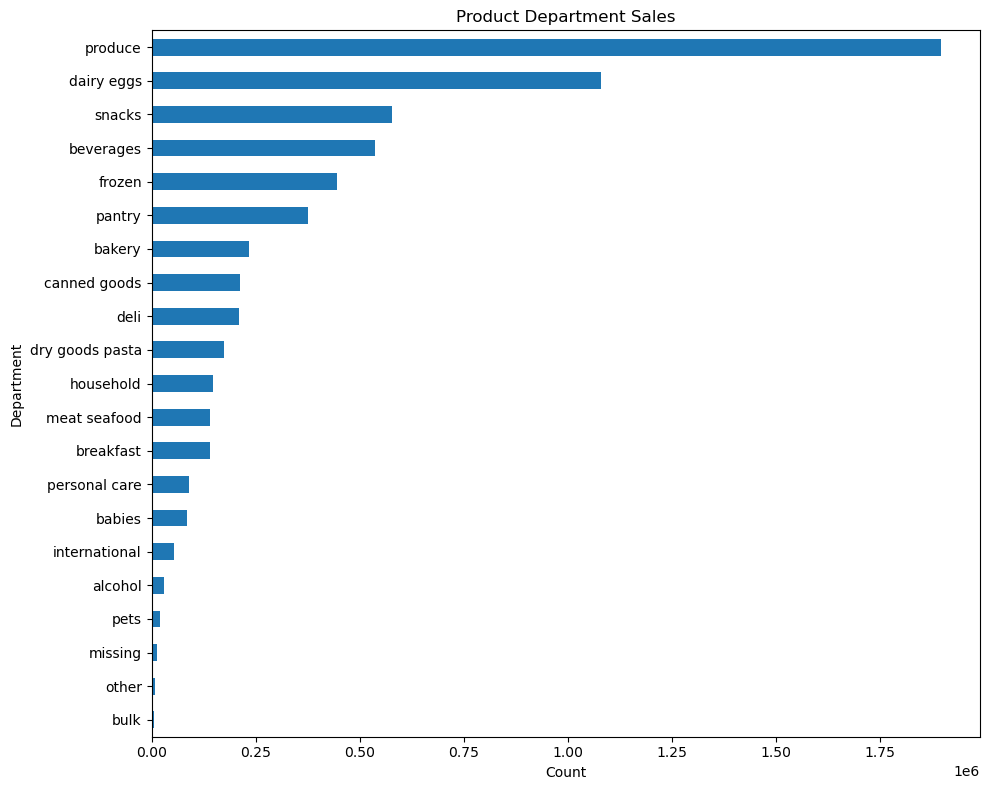

In [73]:
# Create a mapping of department_id to department name
department_mapping = department_mapping_sample.set_index('department_id')['department'].to_dict()
print(department_mapping_sample)


# Get the department_id counts
dept_counts = df_final_dept['department_id'].value_counts().sort_values(ascending=True)

# Map the department IDs to department names for the y-axis labels
dept_counts.index = dept_counts.index.map(department_mapping)

# Plot the bar chart with department names on the y-axis
dept_bar = dept_counts.plot(kind='barh', figsize=(10, 8))

# Customize the chart
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()  # Ensures everything fits without overlapping

output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\04 Analysis\Visualizations\4.10'
plt.savefig(f'{output_path}/Product_Department_Sales2.png')

# Show the chart
plt.show()


In [112]:
df_final_dept.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Surname,Gender,state,Age,date_joined,n_dependants,fam_status,income,department,merge_indicator
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages,both
1,2539329,1,1,2,8,11.114836,12427,3,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,snacks,both
2,2398795,1,2,3,7,15.000000,10258,2,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,snacks,both
3,473747,1,3,3,12,21.000000,12427,2,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,snacks,both
4,473747,1,3,3,12,21.000000,10258,3,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,snacks,both


### Obtaining data description from 'income' variable to then create income labels:

In [243]:
small['income'].describe()

count    6.481475e+06
mean     9.942441e+04
std      4.309220e+04
min      2.590300e+04
25%      6.700200e+04
50%      9.659200e+04
75%      1.278430e+05
max      5.939010e+05
Name: income, dtype: float64

**Income Bins:**

• Low: Up to 67,002

• Lower-Middle: 67,002 to 96,592

• Upper-Middle: 96,592 to 127,843

• High: Above 127,843

### Creating an Income Flag for Customers

In [171]:
# Define new bins based on the 25th, 50th, and 75th percentiles
bins = [0, 67002, 127843, small['income'].max()]
labels = ['Low', 'Middle', 'High']

# Create a new 'income_group' column based on the updated bins
small['income_group'] = pd.cut(small['income'], bins=bins, labels=labels)

Combining these aspects into a single profiling variable:

In [287]:
def customer_profiling(row):
    # Department-based profiling
    if row['department_id'] in [4, 12, 16]:
        department_profile = 'Health-Conscious Shopper'
    elif row['department_id'] in [3, 6, 19]:
        department_profile = 'Convenience Shopper'
    elif row['department_id'] in [13, 14, 17]:
        department_profile = 'Family Shopper'
    elif row['department_id'] == 5 or row['department_id'] == 21:
        department_profile = 'Luxury Shopper'
    elif row['department_id'] == 8:
        department_profile = 'Pet Owner'
    else:
        department_profile = 'General Shopper'
    
    # Age-based profiling
    if row['Age'] < 30:
        age_group = 'Young Adult'
    elif 30 <= row['Age'] < 50:
        age_group = 'Middle-Aged Adult'
    else:
        age_group = 'Older Adult'
    
    # Use the newly created 'income_group' column
    income_group = row['income_group']
    
    # Dependents-based profiling
    if row['n_dependants'] == 0:
        dependants_group = 'Single Adult'
    elif 1 <= row['n_dependants'] <= 2:
        dependants_group = 'Young Family'
    else:
        dependants_group = 'Large Family'
    
    return f"{age_group}, {income_group}, {dependants_group}, {department_profile}"

# Update the 'customer_profile' column
small.loc[:, 'customer_profile'] = small.apply(customer_profiling, axis=1)

# Display the first few rows to verify
small[['Age', 'income', 'n_dependants', 'department_id', 'income_group', 'customer_profile']].head()

,Age,income,n_dependants,department_id,income_group,customer_profile
0,31,40423,3,7,Low,"Middle-Aged Adult, Low, Large Family, General ..."
2,31,40423,3,19,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."
6,31,40423,3,19,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."
12,31,40423,3,19,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."
13,31,40423,3,19,Low,"Middle-Aged Adult, Low, Large Family, Convenie..."


In [427]:
 small['customer_profile'].value_counts()

customer_profile
Older Adult, Middle, Young Family, Health-Conscious Shopper          382441
Older Adult, High, Young Family, Health-Conscious Shopper            300751
Middle-Aged Adult, Middle, Young Family, Health-Conscious Shopper    257168
Older Adult, Middle, Young Family, General Shopper                   212119
Older Adult, Middle, Single Adult, Health-Conscious Shopper          194031
                                                                      ...  
Young Adult, High, Large Family, Luxury Shopper                         143
Young Adult, High, Single Adult, Luxury Shopper                          65
Young Adult, High, Large Family, Pet Owner                               32
Young Adult, High, Young Family, Pet Owner                               25
Young Adult, High, Single Adult, Pet Owner                               24
Name: count, Length: 162, dtype: int64

With 162 distinct customer profiles, each with detailed categorizations, which is valuable; it's also challenging to visualize or analyze these profiles directly due to their granularity.

------------------------------------------------------------------------------------------------

### Creating an appropriate visualization to show the distribution of profiles

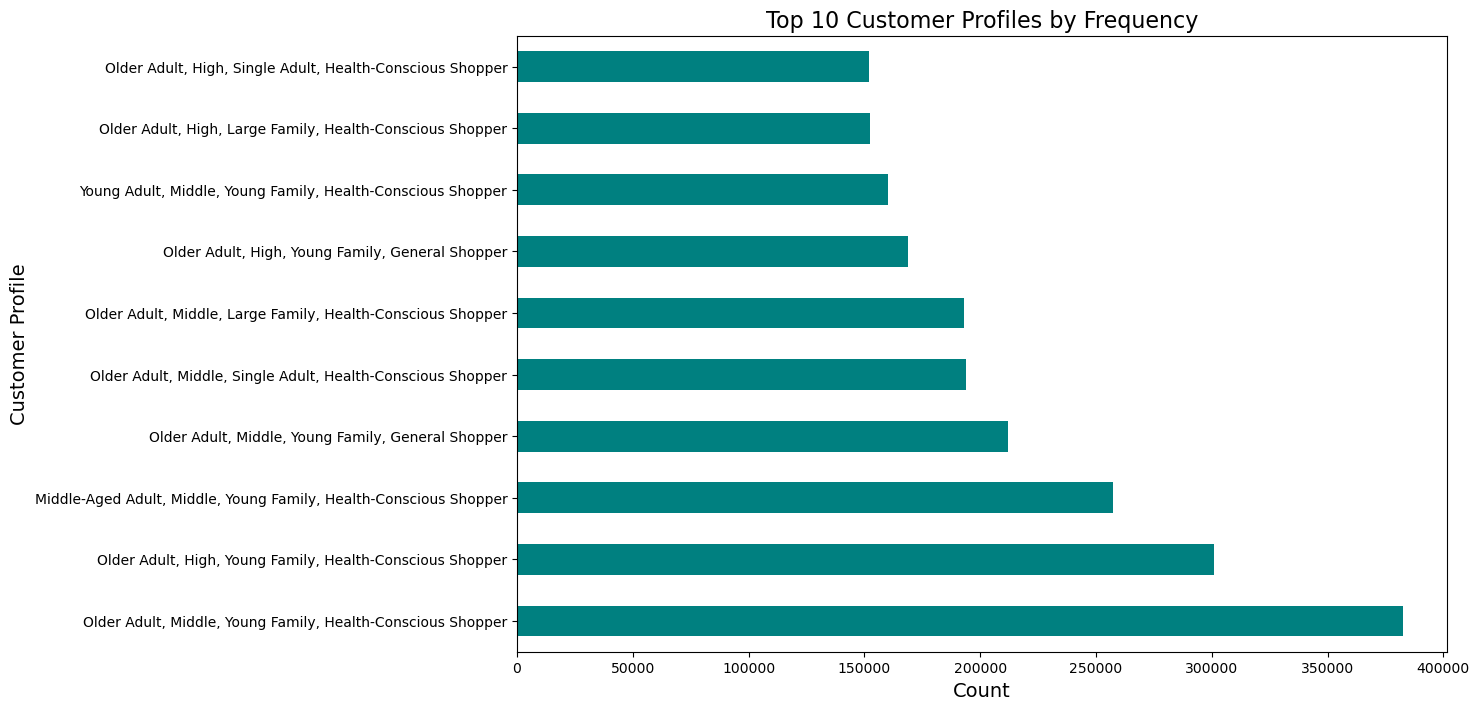

In [397]:
# Limit to top 10 customer profiles by frequency
top_profiles = small['customer_profile'].value_counts().nlargest(10)

# Plot the top 10 profiles using a horizontal bar chart
plt.figure(figsize=(12, 8))
top_profiles.plot(kind='barh', color='teal')

# Add titles and labels
plt.title('Top 10 Customer Profiles by Frequency', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Customer Profile', fontsize=14)

# Save the plot to the specified directory
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\04 Analysis\Visualizations\4.10\top_customer_profiles.png'
plt.savefig(output_path, bbox_inches='tight')

# Display the plot
plt.show()

------------------------------------------------------------------------------------------------

Aggregating the maximum, mean, and minimum values for usage frequency and expenditure on a customer-profile:

In [395]:
small[['order_frequency_flag', 'avg_price']].head()

,order_frequency_flag,avg_price
0,Regular customer,6.367797
2,Regular customer,6.367797
6,Regular customer,6.367797
12,Regular customer,6.367797
13,Regular customer,6.367797


To aggregate the max, mean, and min variables only on 'avr_price' for usage frequency and expenditure. Compute only the max and min on 'order_frequency_flag', as the mean doesn't apply to categorical data (object).

In [96]:
print(small[['order_frequency_flag', 'avg_price']].dtypes)

order_frequency_flag     object
avg_price               float64
dtype: object


In [103]:
# Aggregate the max and min for 'order_frequency_flag' and the max, mean, and min for 'avg_price'
agg_profiles = small.groupby('customer_profile').agg({
    'order_frequency_flag': ['max', 'min'],  # Only max and min for categorical data
    'avg_price': ['max', 'mean', 'min']
}).reset_index()

# Rename columns for clarity
agg_profiles.columns = ['customer_profile', 
                        'max_order_frequency', 'min_order_frequency',
                        'max_avg_price', 'mean_avg_price', 'min_avg_price']

# Display the aggregated DataFrame
agg_profiles.head()


,customer_profile,max_order_frequency,min_order_frequency,max_avg_price,mean_avg_price,min_avg_price
0,"Middle-Aged Adult, High Income, Large Family, ...",Regular customer,Frequent customer,5562.572222,16.931490,7.000000
1,"Middle-Aged Adult, High Income, Large Family, ...",Regular customer,Frequent customer,5562.572222,17.000699,7.000000
2,"Middle-Aged Adult, High Income, Large Family, ...",Regular customer,Frequent customer,3299.328395,14.803079,7.000000
3,"Middle-Aged Adult, High Income, Large Family, ...",Regular customer,Frequent customer,5562.572222,13.029831,7.000000
4,"Middle-Aged Adult, High Income, Large Family, ...",Regular customer,Frequent customer,939.096875,25.589006,7.007692


----------------------------------------------------------------------------------------------------

### Customer Profile Distributions

C:\Users\isaac\AppData\Local\Temp\ipykernel_9204\2139429653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Family Size'] = split_columns[2]  # 3rd component
C:\Users\isaac\AppData\Local\Temp\ipykernel_9204\2139429653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Shopping Preference'] = split_columns[3]  # 4th component


Age Group Distribution:
 0
Older Adult          3224969
Middle-Aged Adult    2038796
Young Adult          1217710
Name: count, dtype: int64

Income Level Distribution:
 0
Middle    4244978
High      1251444
Low        985053
Name: count, dtype: int64

Family Size Distribution:
 Family Size
Young Family    1290575
Single Adult     330888
Large Family     329519
Name: count, dtype: int64

Shopping Preference Distribution:
 Shopping Preference
Health-Conscious Shopper    1587671
General Shopper              363311
Name: count, dtype: int64


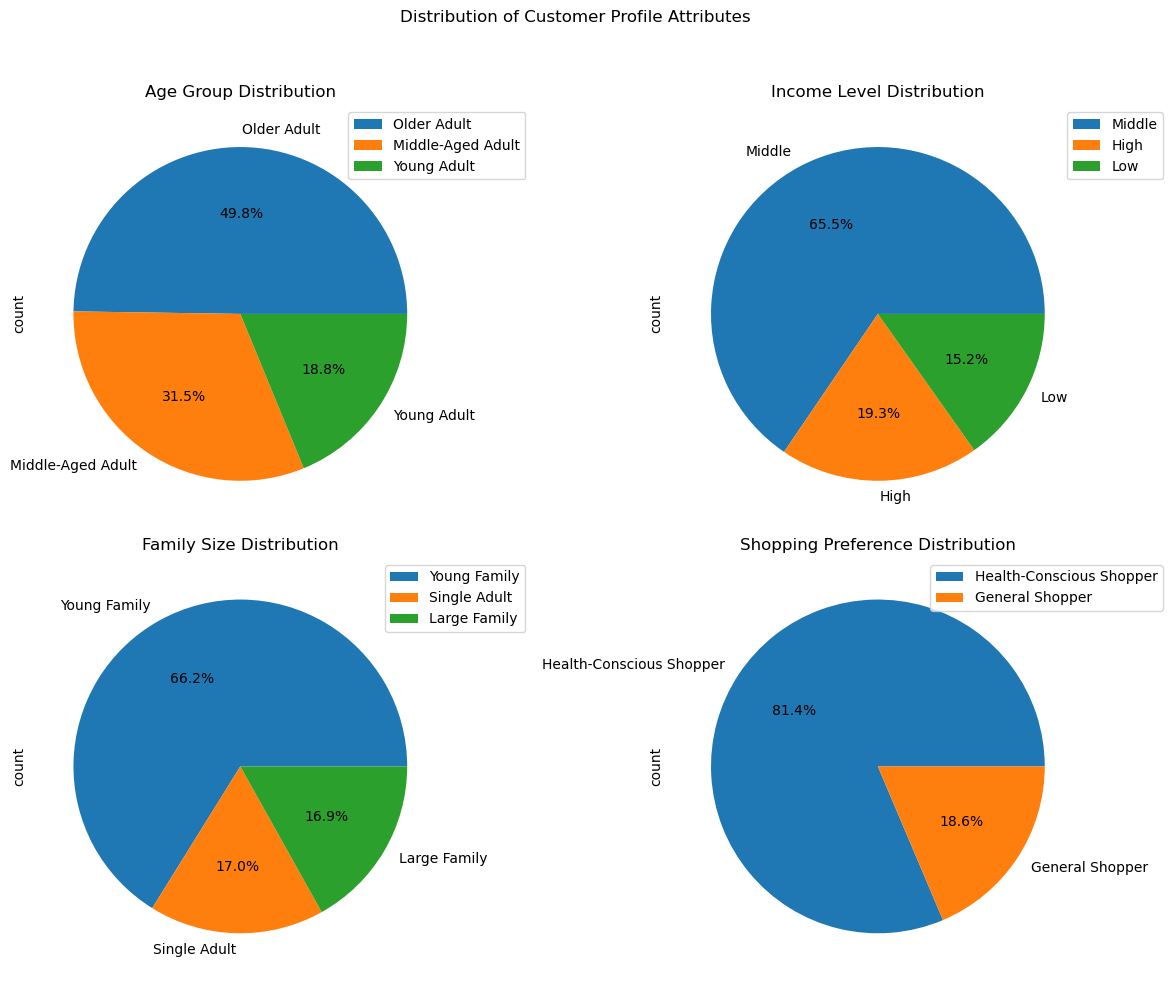

In [392]:
# Path for saving the chart
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\04 Analysis\Visualizations\4.10'

# Extract the values for the age group and income level distributions
# Age Group Distribution (Young Adult, Middle-Aged Adult, Older Adult)
age_group_counts = small['customer_profile'].str.extract(r'\b(Young Adult|Middle-Aged Adult|Older Adult)\b')[0].value_counts()

# Income Level Distribution (Low, Middle, High)
income_profile_counts = small['customer_profile'].str.extract(r'\b(Low|Middle|High)\b')[0].value_counts()

# Split the customer_profile into four components: Age Group, Income Level, Family Size, Shopping Preference
split_columns = small['customer_profile'].str.split(',', expand=True).apply(lambda x: x.str.strip())

# Assign columns for Family Size and Shopping Preference (assuming the 3rd and 4th components represent them)
filtered_data['Family Size'] = split_columns[2]  # 3rd component
filtered_data['Shopping Preference'] = split_columns[3]  # 4th component

# Calculate the distributions for Family Size and Shopping Preference
family_size_distribution = filtered_data['Family Size'].value_counts()
shopping_preference_distribution = filtered_data['Shopping Preference'].value_counts()

# Print the distributions
print("Age Group Distribution:\n", age_group_counts)
print("\nIncome Level Distribution:\n", income_profile_counts)
print("\nFamily Size Distribution:\n", family_size_distribution)
print("\nShopping Preference Distribution:\n", shopping_preference_distribution)

# Create the 2x2 plot for all distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Customer Profile Attributes')

# Plot Age Group Distribution
age_group_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0], title='Age Group Distribution')
axes[0, 0].legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Plot Income Level Distribution
income_profile_counts.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 1], title='Income Level Distribution')
axes[0, 1].legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Plot Family Size Distribution
family_size_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 0], title='Family Size Distribution')
axes[1, 0].legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Plot Shopping Preference Distribution
shopping_preference_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axes[1, 1], title='Shopping Preference Distribution')
axes[1, 1].legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# Adjust layout to avoid overlapping elements
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the final combined image
plt.savefig(f'{output_path}/Customer_Profile_Distributions.png')

plt.show()

### Producing Charts to Compare Customer Profiles with Regions and Departments

Bar chart with age groups categorized as "Young (<=35)", "Middle-aged (36-55)", and "Senior (>55)" across different regions:

C:\Users\isaac\AppData\Local\Temp\ipykernel_14304\3071437396.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_region_counts = small.groupby(['age_group', 'Region']).size().unstack()


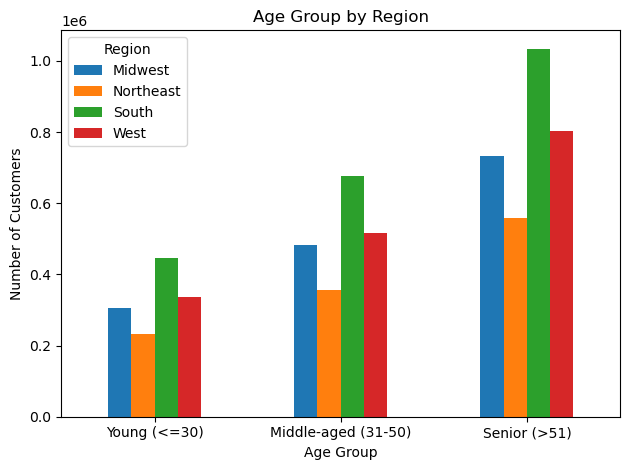

In [155]:
# Create age groups using .loc function
bins = [0, 30, 50, 100]  # Define age bins: 0-30, 31-50, 51+
labels = ['Young (<=30)', 'Middle-aged (31-50)', 'Senior (>51)']

# Make sure to create a new column in the original DataFrame
small = small.copy()
small.loc[:, 'age_group'] = pd.cut(small['Age'], bins=bins, labels=labels)

# Group by age group and region, then count
age_region_counts = small.groupby(['age_group', 'Region']).size().unstack()

# Plot the bar chart
age_region_counts.plot(kind='bar', stacked=False)
plt.title('Age Group by Region')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.tight_layout()

# Save the plot
#plt.savefig('Age_Group_by_Region.png')
output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\04 Analysis\Visualizations\4.10'
#plt.savefig(f'{output_path}/Age_Group_by_Region2.png')

# Show the plot
plt.show()

Bar Chart: Region by Customer Frequency:

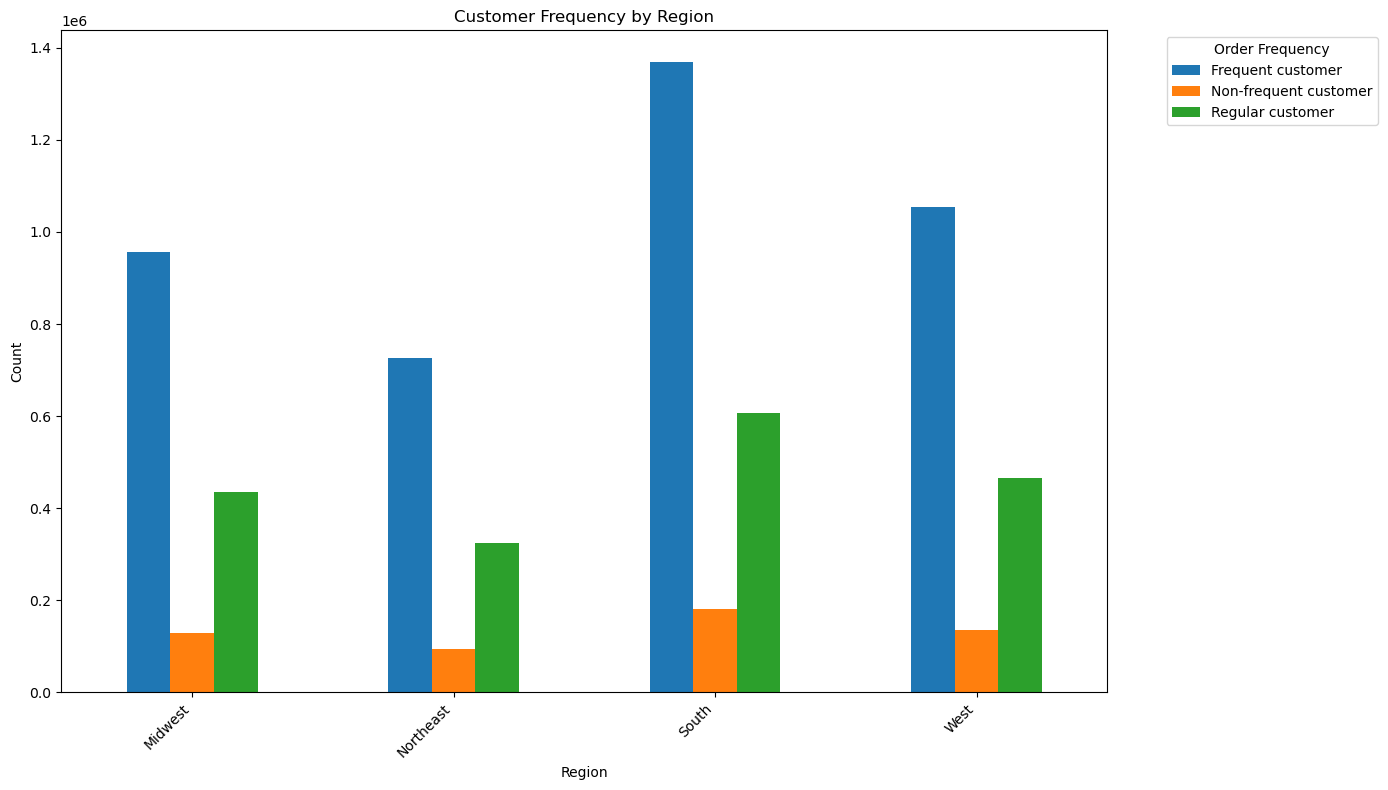

In [157]:
# Group by region and customer frequency
freq_region = small.groupby(['Region', 'order_frequency_flag']).size().unstack().fillna(0)

# Plot a bar chart
freq_region.plot(kind='bar', figsize=(14, 8))
plt.title('Customer Frequency by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Order Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('Customer Frequency by Region.png')

plt.show()

Bar chart by time of day and region:

C:\Users\isaac\AppData\Local\Temp\ipykernel_14304\1995753848.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_region = small.groupby(['time_of_day', 'Region']).size().unstack().fillna(0)


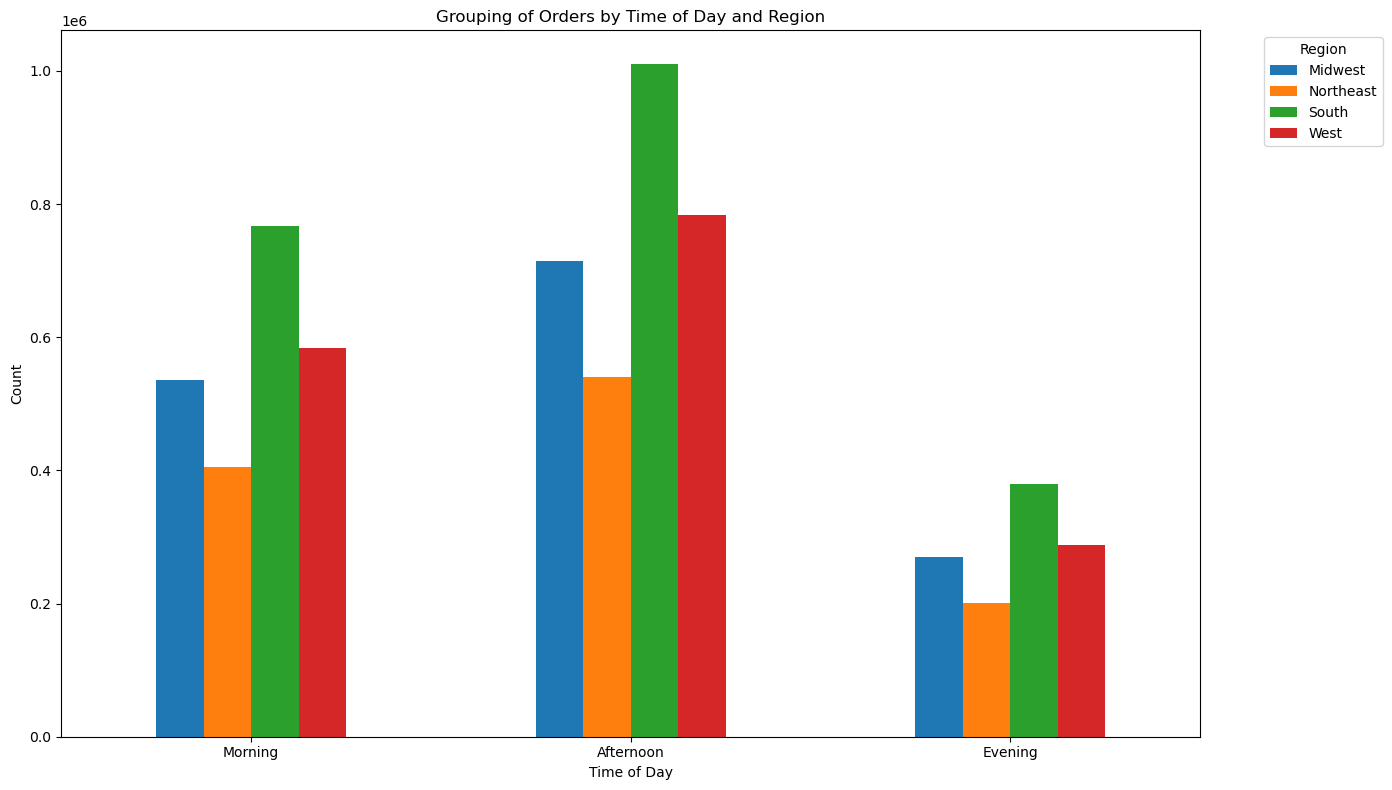

In [157]:
# Define the bins and labels
bins = [0, 12, 18, 24]
labels = ['Morning', 'Afternoon', 'Evening']

# Create a new column for the time of day based on the hour
small['time_of_day'] = pd.cut(small['order_hour_of_day'], bins=bins, labels=labels, right=False)

# Group by time of day and region
time_region = small.groupby(['time_of_day', 'Region']).size().unstack().fillna(0)

# Plot a bar chart
time_region.plot(kind='bar', figsize=(14, 8))
plt.title('Grouping of Orders by Time of Day and Region')
plt.ylabel('Count')
plt.xlabel('Time of Day')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.savefig('Orders by Time of Day and Region')

plt.show()

#### Creating bar charts Income group by region

Bar chart showing how these income groups (Low, Medium, and High) are distributed across different regions:

C:\Users\isaac\AppData\Local\Temp\ipykernel_9204\1361142902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_region = small.groupby(['income_group', 'Region']).size().unstack().fillna(0)


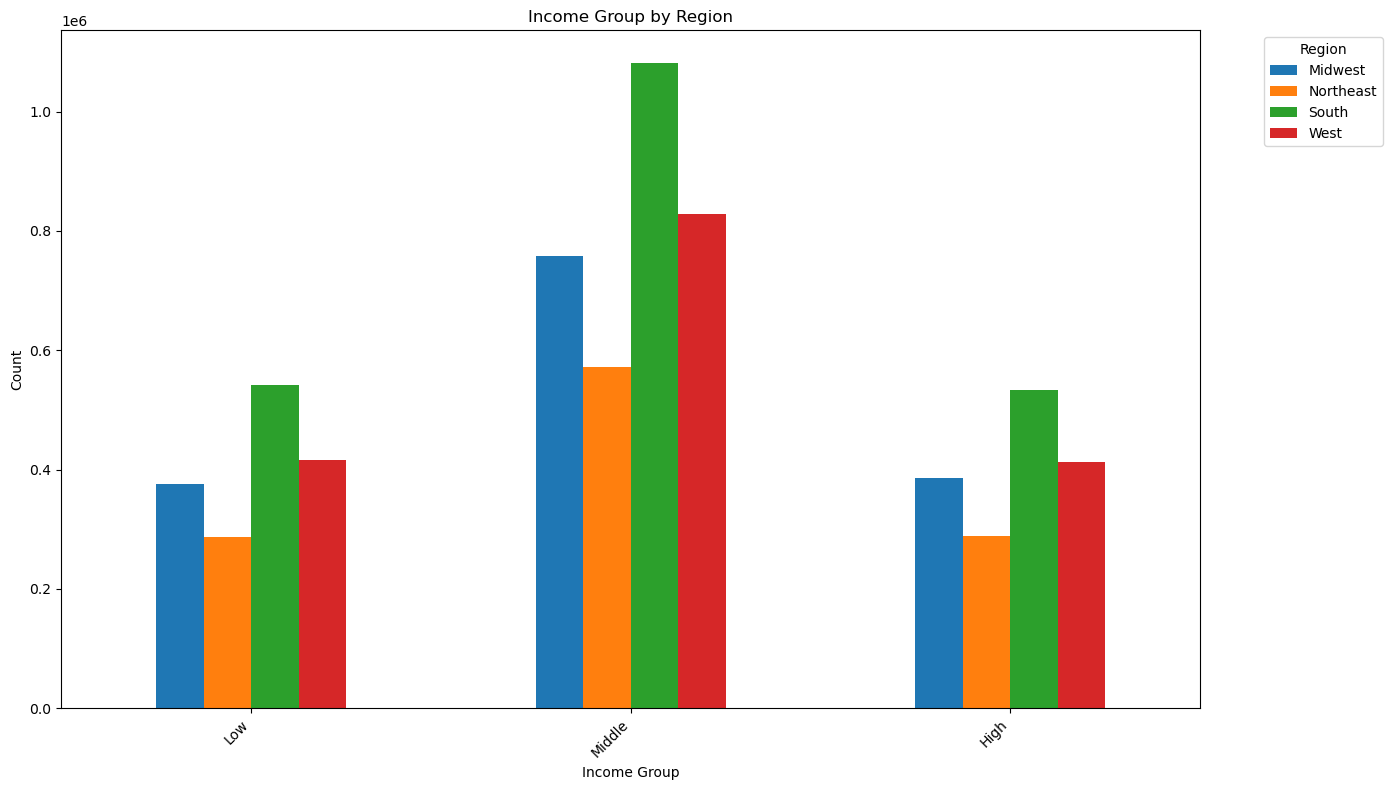

In [305]:
# Group by income group and region
income_region = small.groupby(['income_group', 'Region']).size().unstack().fillna(0)

# Plot a bar chart
income_region.plot(kind='bar', figsize=(14, 8))
plt.title('Income Group by Region')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#plt.savefig('Income by Region')

plt.show()

### Stacked bar chart based on regions vs. top 5 'customer_profile'

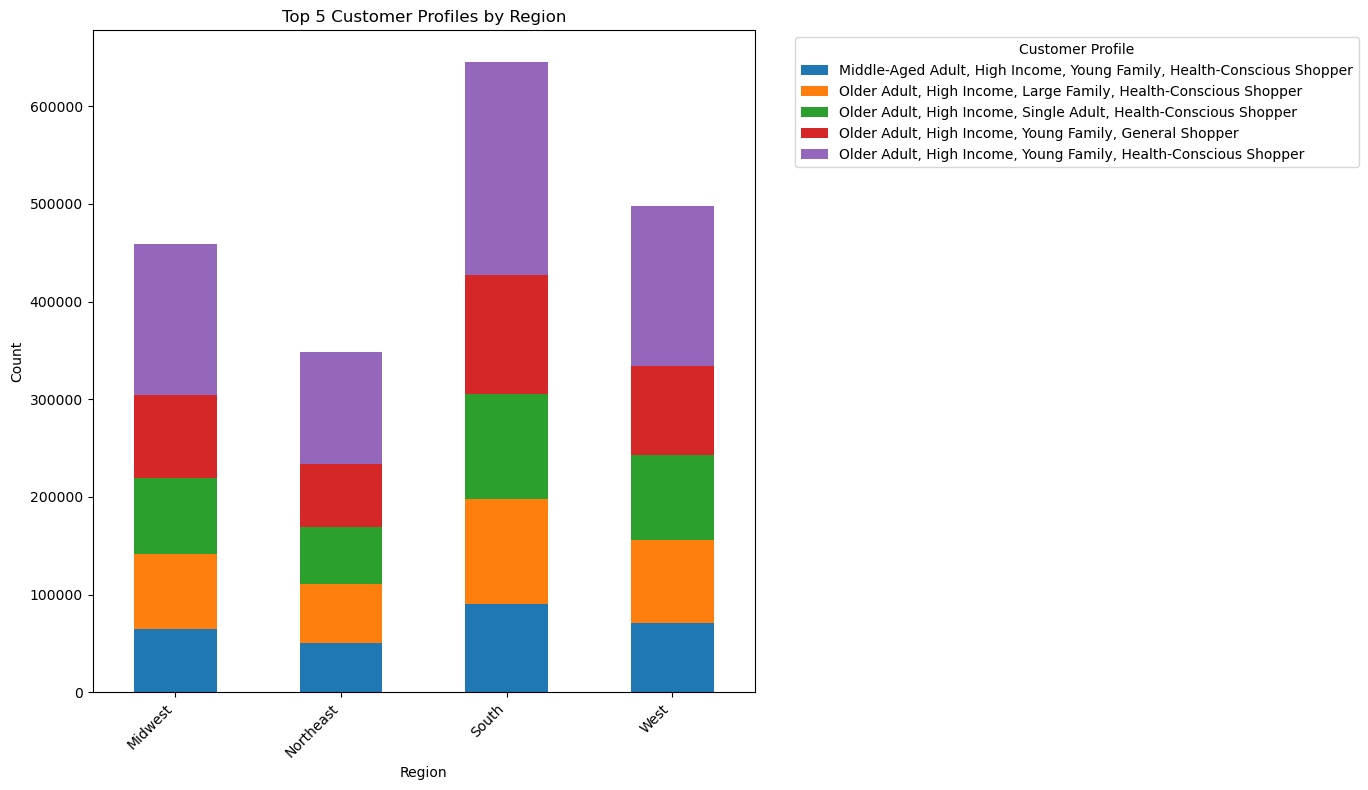

In [311]:
# Group by region and customer profile
profile_region = filtered_data.groupby(['Region', 'customer_profile']).size().unstack().fillna(0)

# Plot
profile_region.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 5 Customer Profiles by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#Save the plot
#plt.savefig('Top_5_Customer_Profiles_by_Region.png')

# Show the plot
plt.show()


### Stacked bar chart based on the defined department bins by 'customer_profile'

C:\Users\isaac\AppData\Local\Temp\ipykernel_9204\9225278.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['department_bin'] = filtered_data['department_id'].apply(


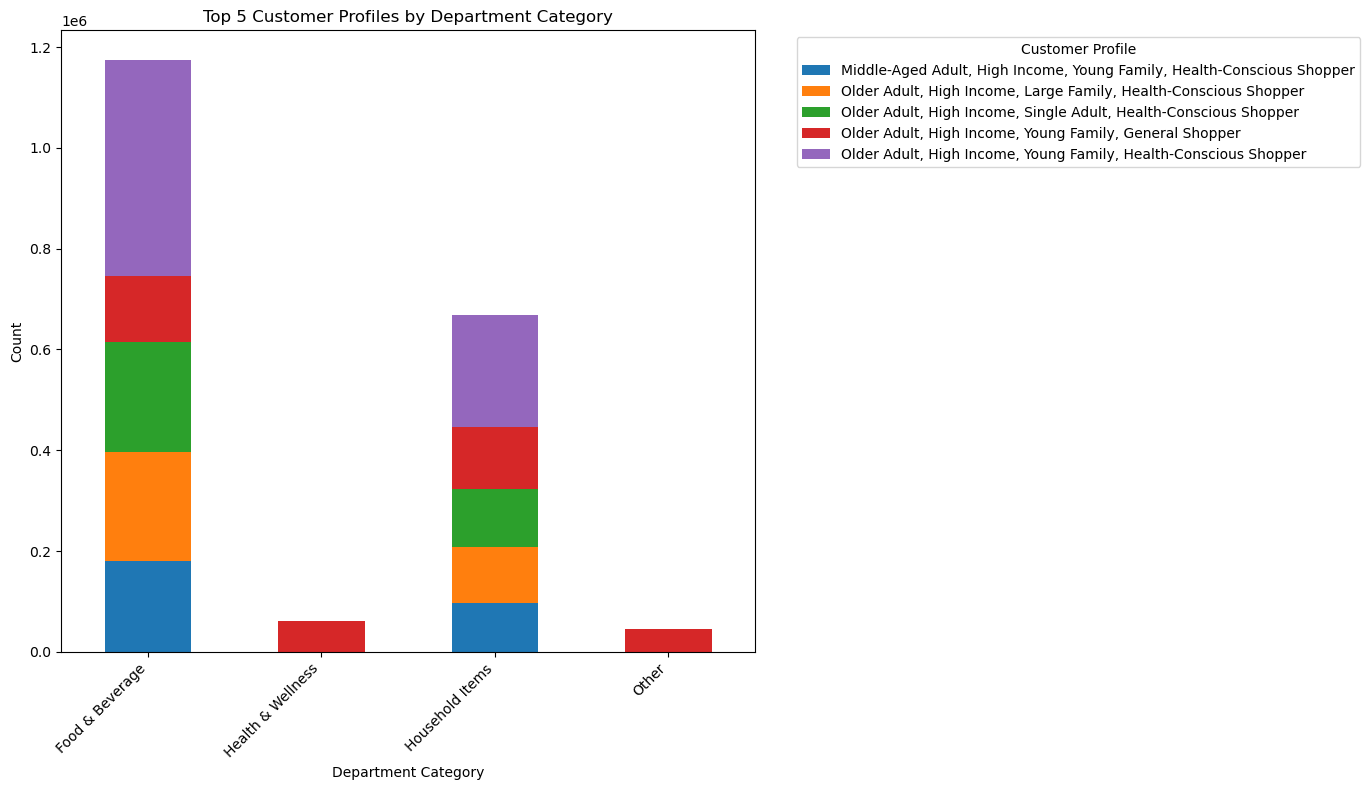

In [222]:
# Define bins for departments
department_bins = {
    'Food & Beverage': [1, 2, 3, 4, 9, 10, 12, 14],
    'Household Items': [5, 6, 7, 11, 16, 17],
    'Pet Food & Supplies': [8],
    'Health & Wellness': [18, 19, 20, 21]
}

# Assign department categories to the data
filtered_data['department_bin'] = filtered_data['department_id'].apply(
    lambda x: next((k for k, v in department_bins.items() if x in v), 'Other')
)

# Group by department bin and customer profile
profile_dept = filtered_data.groupby(['department_bin', 'customer_profile']).size().unstack().fillna(0)

# Plot
profile_dept.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top 5 Customer Profiles by Department Category')
plt.ylabel('Count')
plt.xlabel('Department Category')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('top_5_customer_profiles_by_department_category.png')

plt.show()

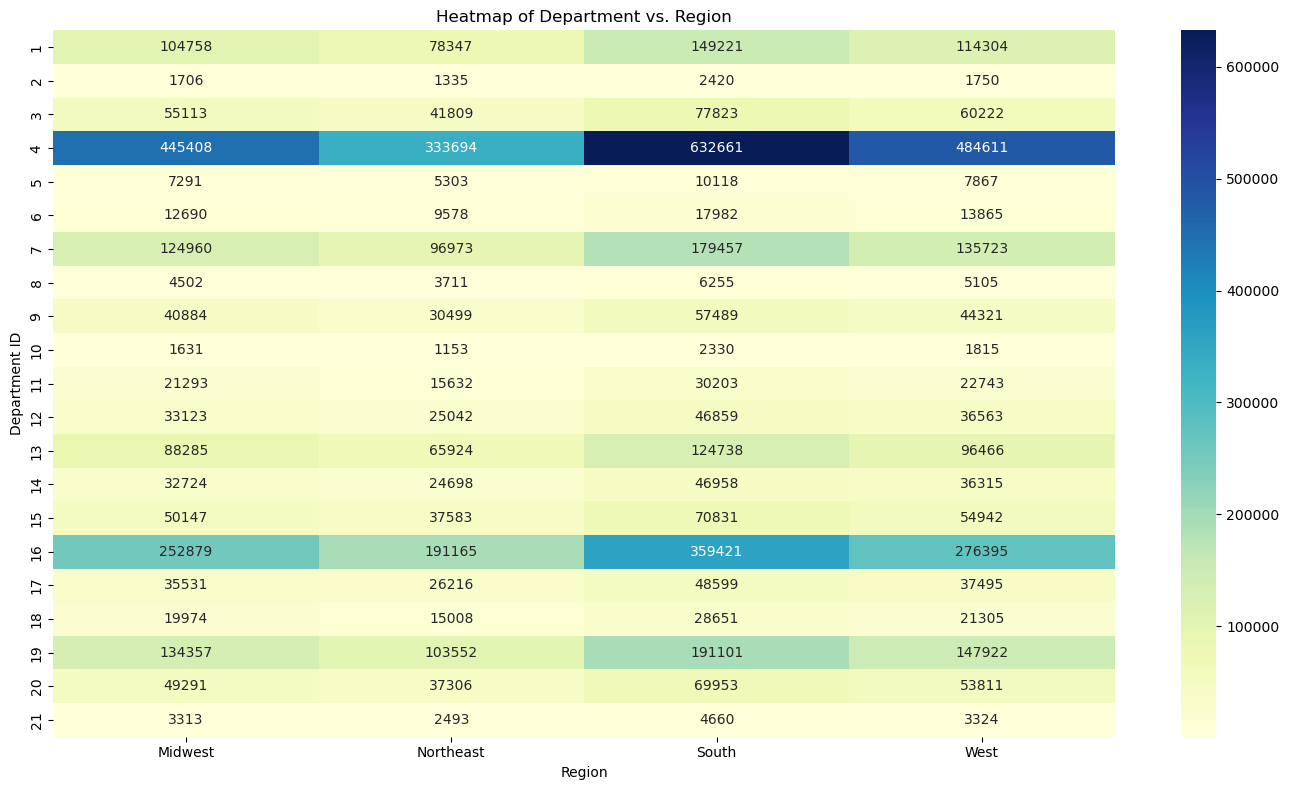

In [220]:
# Group by department and region, then count the number of occurrences
dept_region_counts = small.groupby(['department_id', 'Region']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(dept_region_counts, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Department vs. Region')
plt.ylabel('Department ID')
plt.xlabel('Region')
plt.tight_layout()

# Save the plot
plt.savefig('Heatmap of Department vs. Region.png')

plt.show()

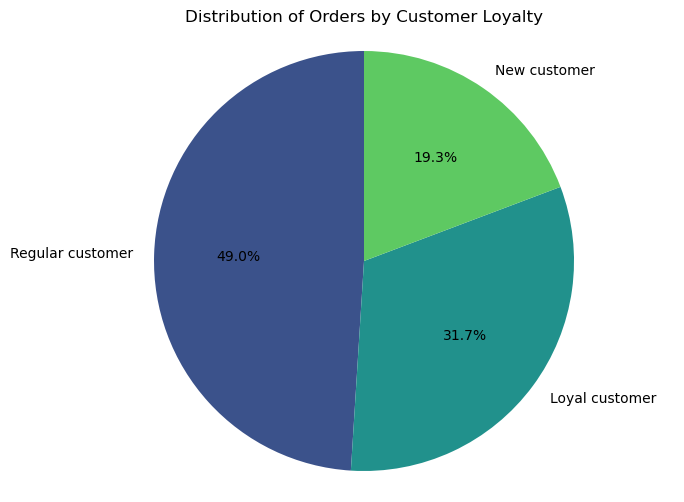

In [115]:
# Create the pie chart for the "loyalty_flag" column
loyalty_counts = small['loyalty_flag'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(loyalty_counts)), startangle=90)
plt.title('Distribution of Orders by Customer Loyalty')
plt.axis('equal')  # Ensure the pie chart is a circle

output_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\4. Python Fundamentals for Data Analysts\07-2024 Instacart Basket Analysis\04 Analysis\Visualizations\4.10'
plt.savefig(f'{output_path}/loyalty_flag_piechart.png')

plt.show()

<Figure size 800x600 with 0 Axes>

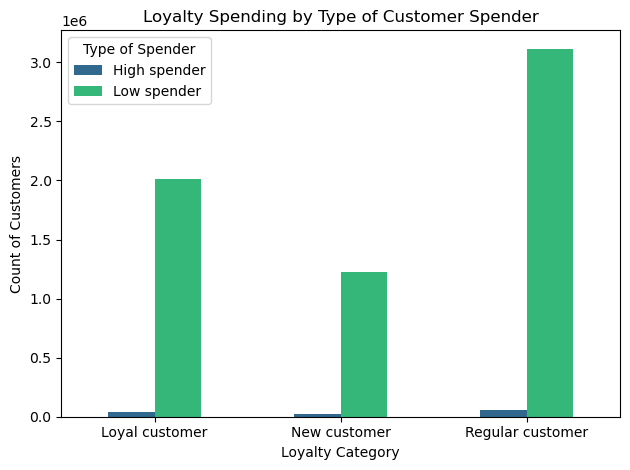

In [117]:
# Creating a crosstab to compare 'loyalty_flag' with 'spending_flag'
loyalty_spending_comparison = pd.crosstab(small['loyalty_flag'], small['spending_flag'], dropna=False)

# Creating a Bar Chart for Loyalty spending by type of spender
plt.figure(figsize=(8, 6))  # Adjust the figure size
loyalty_spending_comparison.plot(kind='bar', rot=0, color=sns.color_palette('viridis', len(loyalty_spending_comparison.columns)))
plt.title('Loyalty Spending by Type of Customer Spender')
plt.xlabel('Loyalty Category')
plt.ylabel('Count of Customers')
plt.legend(title='Type of Spender')
plt.tight_layout()  # Adjust the layout

plt.savefig(f'{output_path}/loyalty_spending_bar_chart.png')
plt.show()

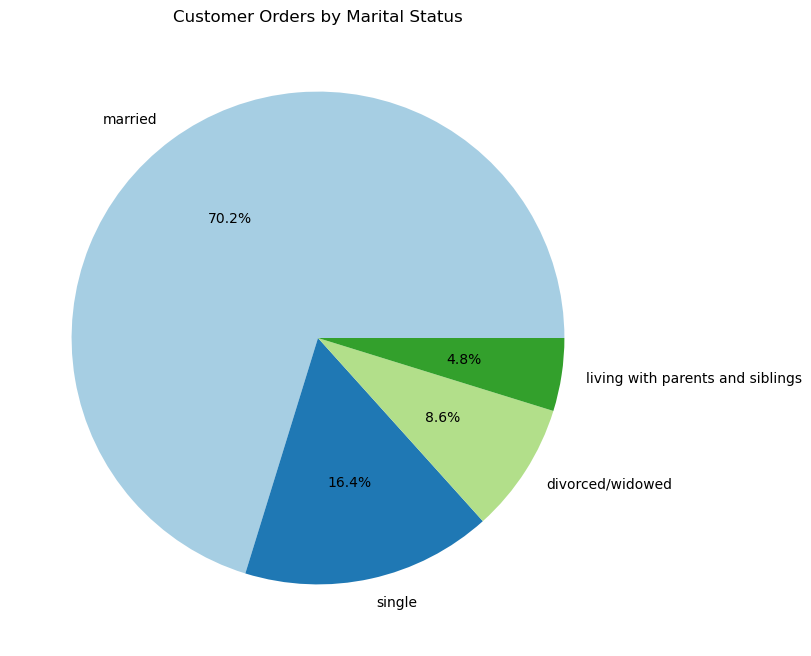

In [123]:
order_counts = small['fam_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(order_counts))))
plt.title('Customer Orders by Marital Status')

plt.savefig(f'{output_path}/Customer Orders by Marital Status.png')
plt.show()

In [143]:
# Create age groups using .loc function
bins = [0, 30, 50, 100]  # Define age bins: 0-30, 31-50, 51+
labels = ['Young (<=30)', 'Middle-aged (31-50)', 'Senior (>51)']

# Make sure to create a new column in the original DataFrame
small = small.copy()
small.loc[:, 'age_group'] = pd.cut(small['Age'], bins=bins, labels=labels)

C:\Users\isaac\AppData\Local\Temp\ipykernel_14304\3939448519.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_counts = small.groupby(['age_group', 'fam_status'])['order_id'].count()
C:\Users\isaac\AppData\Local\Temp\ipykernel_14304\3939448519.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_order_freq = order_counts.groupby(['age_group', 'fam_status'])['order_count'].median()


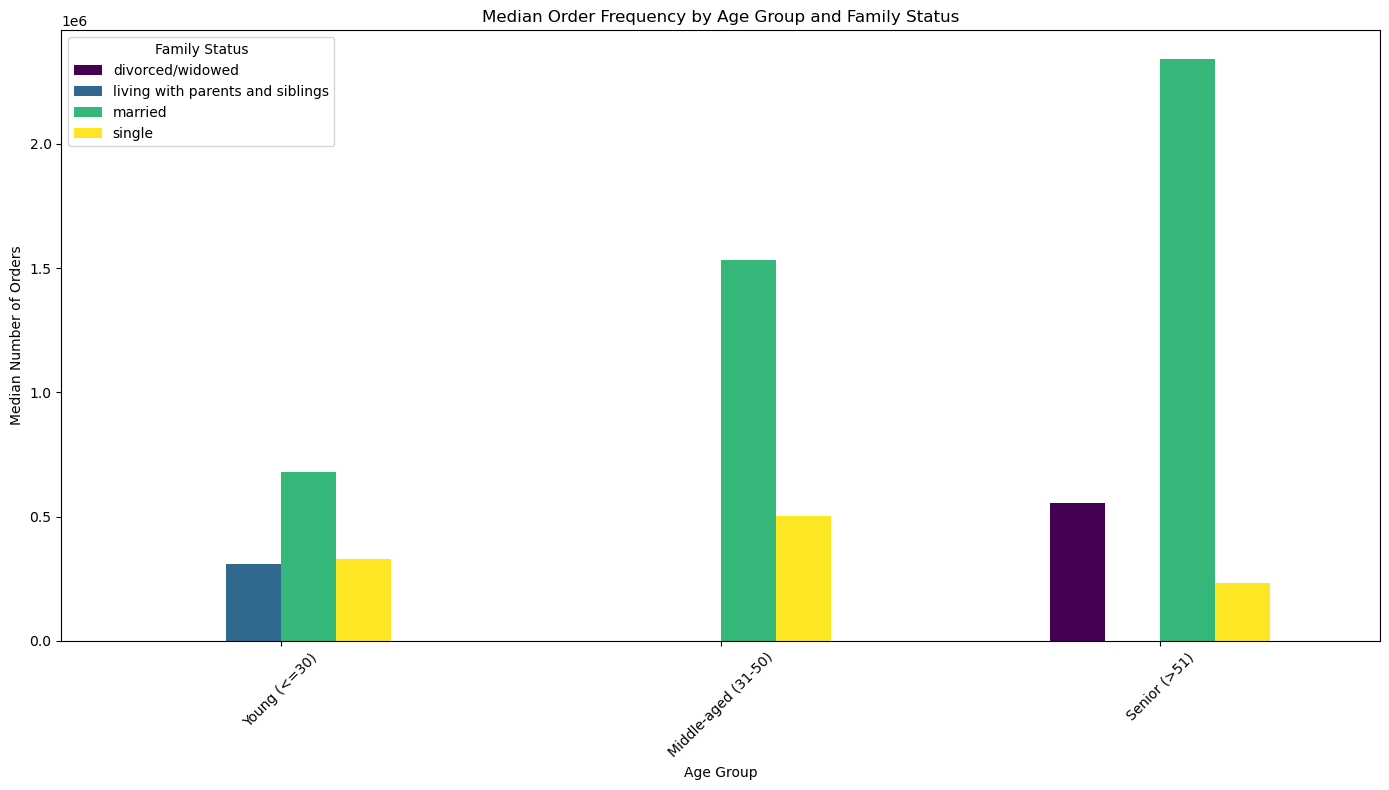

In [151]:
# Count orders by age group and family status
order_counts = small.groupby(['age_group', 'fam_status'])['order_id'].count()

# Convert to DataFrame and calculate median order frequency
order_counts = order_counts.reset_index(name='order_count')
median_order_freq = order_counts.groupby(['age_group', 'fam_status'])['order_count'].median()

# Reshape the data to prepare for plotting
pivot_table = median_order_freq.unstack().fillna(0)

# Plotting
pivot_table.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Median Order Frequency by Age Group and Family Status')
plt.ylabel('Median Number of Orders')
plt.xlabel('Age Group')
plt.legend(title='Family Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(f'{output_path}/Median Order Frequency by Age Group and Family Status.png')

plt.show()


In [173]:
small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6481475 entries, 0 to 6481474
Data columns (total 37 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  int64   
 2   order_number             int64   
 3   order_dow                int64   
 4   order_hour_of_day        int64   
 5   days_since_prior_order   float64 
 6   product_id               int64   
 7   add_to_cart_order        int64   
 8   reordered                int64   
 9   _merge                   category
 10  product_name             object  
 11  aisle_id                 int64   
 12  department_id            int64   
 13  prices                   float64 
 14  price_range_loc          object  
 15  busiest_days             object  
 16  busiest_period_of_day    object  
 17  max_order                int64   
 18  loyalty_flag             object  
 19  avg_price                float64 
 20  spending_flag           

### Answering Question about Differences in Ordering Habits of Different Customer Profiles

C:\Users\isaac\AppData\Local\Temp\ipykernel_14304\3949485322.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income_group', y='prices', data=small, ci=None)


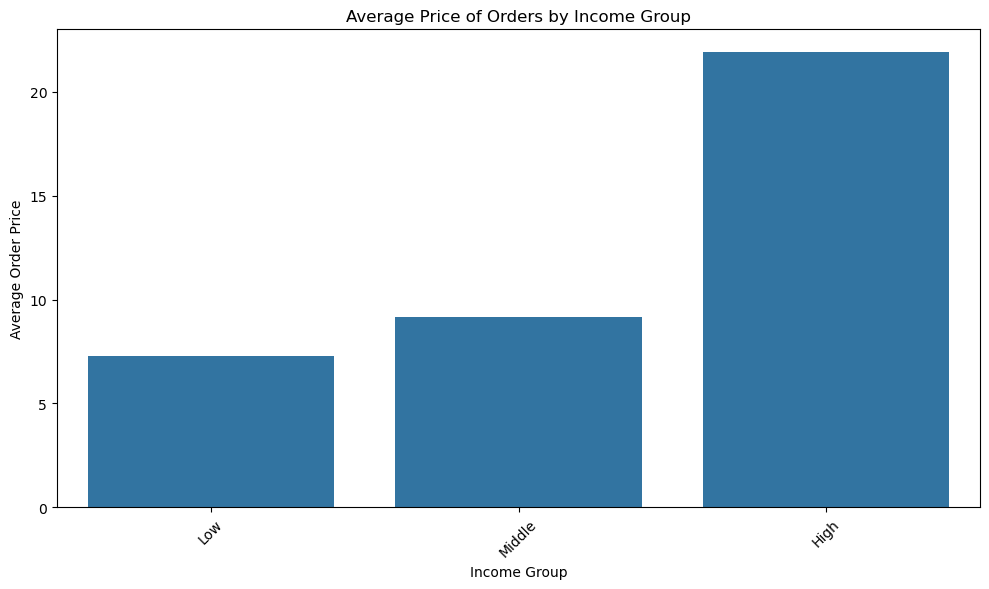

In [188]:
 #Chart 1: Average Price of Orders by Income Group
plt.figure(figsize=(10, 6))
sns.barplot(x='income_group', y='prices', data=small, ci=None)
plt.title('Average Price of Orders by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Order Price')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(f'{output_path}/Average Price of Orders by Income Group.png')

plt.show()

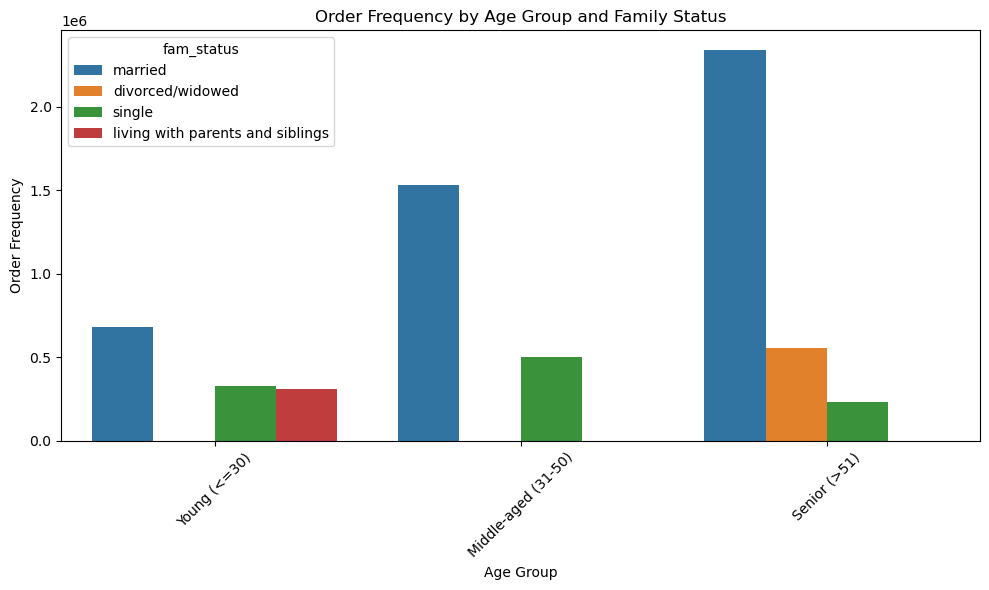

In [192]:
# Chart 2: Order Frequency by Age Group and Family Status
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='fam_status', data=small)
plt.title('Order Frequency by Age Group and Family Status')
plt.xlabel('Age Group')
plt.ylabel('Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(f'{output_path}/Order Frequency by Age Group and Family Status.png')

plt.show()

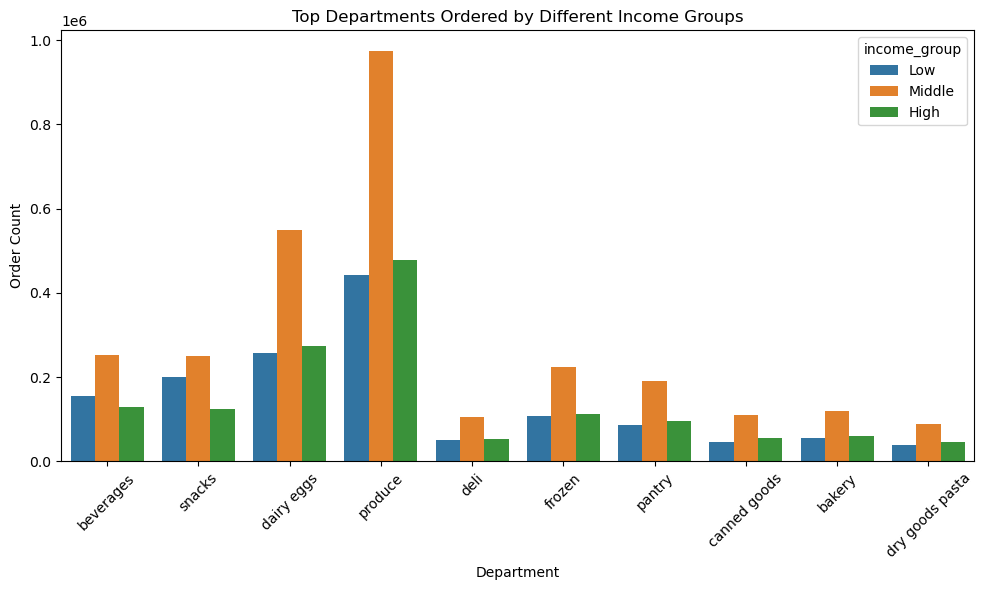

In [190]:
# Chart 3: Top Departments Ordered by Different Income Groups
plt.figure(figsize=(10, 6))
# Selecting top departments to visualize
top_departments = small['department'].value_counts().index[:10]  # Top 10 departments
filtered_small = small[small['department'].isin(top_departments)]
sns.countplot(x='department', hue='income_group', data=filtered_small)
plt.title('Top Departments Ordered by Different Income Groups')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(f'{output_path}/Top Departments Ordered by Different Income Groups.png')

plt.show()

In [350]:
small[['customer_profile', 'income_group']].describe()

,customer_profile,income_group
count,6481475,6481475
unique,162,3
top,"Older Adult, Middle, Young Family, Health-Cons...",Middle
freq,382441,3240721


In [436]:
small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6481475 entries, 0 to 32404850
Data columns (total 38 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  int64   
 2   order_number             int64   
 3   order_dow                int64   
 4   order_hour_of_day        int64   
 5   days_since_prior_order   float64 
 6   product_id               int64   
 7   add_to_cart_order        int64   
 8   reordered                int64   
 9   _merge                   category
 10  product_name             object  
 11  aisle_id                 int64   
 12  department_id            int64   
 13  prices                   float64 
 14  price_range_loc          object  
 15  busiest_days             object  
 16  busiest_period_of_day    object  
 17  max_order                int64   
 18  loyalty_flag             object  
 19  avg_price                float64 
 20  spending_flag            obj

In [444]:
# List of flag/label columns
flag_columns = [
    'price_range_loc', 'busiest_days', 'busiest_period_of_day',
    'loyalty_flag', 'spending_flag', 'order_frequency_flag',
    'exclusion_flag', 'age_group', 'time_of_day', 'income_group'
]

# Loop through each column and display the frequency count
for col in flag_columns:
    print(f"\nFrequency of '{col}':\n")
    print(small[col].value_counts())


Frequency of 'price_range_loc':

price_range_loc
Mid-range product     4322545
Low-range product     2024898
High-range product     134032
Name: count, dtype: int64

Frequency of 'busiest_days':

busiest_days
Regular days    2580473
Busiest days    2375791
Slowest days    1525211
Name: count, dtype: int64

Frequency of 'busiest_period_of_day':

busiest_period_of_day
Most orders       4224403
Average orders    1998734
Fewest orders      258338
Name: count, dtype: int64

Frequency of 'loyalty_flag':

loyalty_flag
Regular customer    3176115
Loyal customer      2057214
New customer        1248146
Name: count, dtype: int64

Frequency of 'spending_flag':

spending_flag
Low spender     6354257
High spender     127218
Name: count, dtype: int64

Frequency of 'order_frequency_flag':

order_frequency_flag
Frequent customer        4108153
Regular customer         1833251
Non-frequent customer     540071
Name: count, dtype: int64

Frequency of 'exclusion_flag':

exclusion_flag
Include    4885129
